In [1]:
# This script visualizes the output of a gaze interval query

# The purpose of gaze interval queries is to determine whether each particiant is looking at one of the other participants, 
# looking away, or transitioning between one of the other states

In [2]:
import re
import matplotlib.pyplot as plt

In [3]:
#define location of data to visualize

# data_dir="C:/Users/gary4/Documents/repos/Recording-And-Analysis-Plugin/Data/group0"
data_dir="Z:/Gary/Research/APlausE-MR_MR4_CollaborativeTelepresenceStudy/gazeAnalysis/group0"
file_name="aplausemr_group0_date20240708_10_42_trial0_experimentcontroller_interval_requests_results.csv"



file_path = data_dir + "/" + file_name

In [4]:
# define some data structures for reading data

class Interval:
    def __init__(self, start, end):
        self.start = start
        self.end = end
    def str(self):
        return str(self.start) + "," + str(self.end)
        
class GazeIntervalResults:
    def __init__(self, desc):
        self.intervals = []
        
        # find participant numbers for gazer and gaze target
        participant_label_ends = [m.end() for m in re.finditer('Participant', desc)]
        self.gazer = int(desc[participant_label_ends[0]])
        self.gaze_target = int(desc[participant_label_ends[1]])
        
    def add_interval(self,start,end):
        self.intervals.append(Interval(start,end))
        
    def print_intervals(self):
        for i in self.intervals:
            print(i.str())

In [5]:
# read data into structures

results = []

f = open(file_path, "r")

while True:
    line = f.readline()
    if not line:
        break

    if line.startswith("AnalysisQuery"):
        results.append(GazeIntervalResults(line))
    elif line.startswith('StartTime') or not line.strip():
        pass
    else:
        interval = line.split(',')
        results[-1].add_interval(float(interval[0]), float(interval[1]))
f.close()


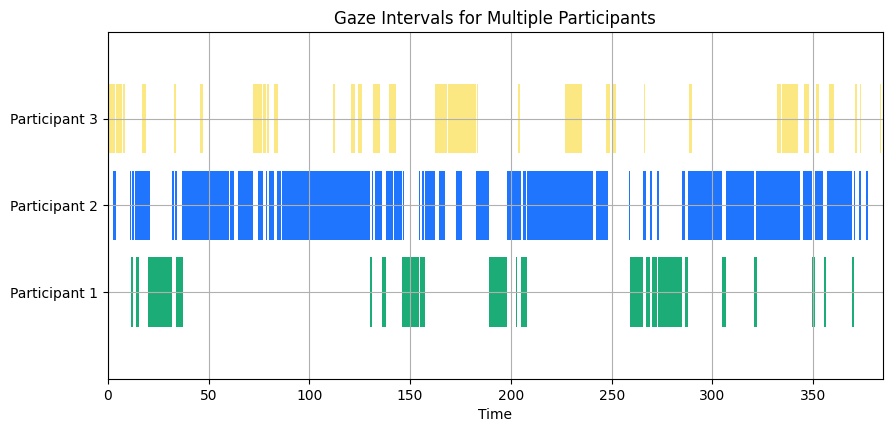

In [6]:
cols = ['#EE204D', '#1CAC78', '#1F75FE', '#FCE883']

# Function to visualize multiple GazeIntervalResults
def plot_multiple_gaze_results(results_list):
    fig, ax = plt.subplots(figsize=(10, len(results_list) * 1.5))
    
    # Plot each GazeIntervalResults on a different line
    for idx, results in enumerate(results_list):
        for interval in results.intervals:
            ax.broken_barh([(interval.start, interval.end - interval.start)], (idx - 0.4, 0.8), facecolors=cols[int(results.gaze_target)])
    y_labels = []
    for results in results_list:
        y_labels.append("Participant " + str(results.gaze_target))
    
    # Customize the plot
    ax.set_ylim(-1, len(results_list))
    ax.set_xlim(0, max(interval.end for results in results_list for interval in results.intervals) + 1)
    ax.set_xlabel('Time')
    ax.set_yticks(range(len(results_list)))
    ax.set_yticklabels(y_labels)
    ax.grid(True)
    
    plt.title("Gaze Intervals for Multiple Participants")
    plt.show()
    

for p in range(1):
    plot_multiple_gaze_results([r for r in results if r.gazer == p])

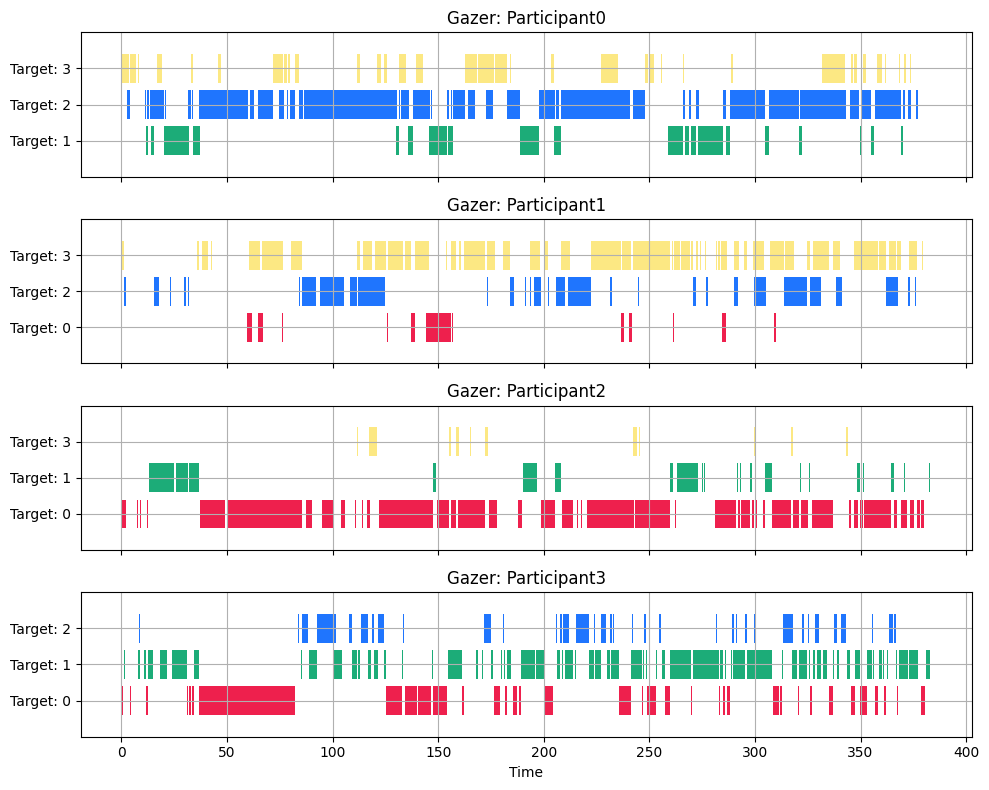

In [7]:
cols = ['#EE204D', '#1CAC78', '#1F75FE', '#FCE883']

# Function to visualize multiple GazeIntervalResults with subplots for each gazer
def plot_gazers_subplots(results_list):
    # Group results by gazer
    gazer_dict = {}
    for results in results_list:
        if results.gazer not in gazer_dict:
            gazer_dict[results.gazer] = []
        gazer_dict[results.gazer].append(results)
    
    # Create subplots
    num_gazers = len(gazer_dict)
    fig, axes = plt.subplots(num_gazers, 1, figsize=(10, num_gazers * 2), sharex=True)
    
    if num_gazers == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one subplot
    
    # Plot each gazer in a separate subplot
    for ax, (gazer, results_group) in zip(axes, gazer_dict.items()):
        for idx, results in enumerate(results_group):
            for interval in results.intervals:
                ax.broken_barh([(interval.start, interval.end - interval.start)], (idx - 0.4, 0.8),  facecolors=cols[int(results.gaze_target)])
            # ax.text(-0.1, idx, f"Target: {results.gaze_target}", va='center', ha='right', transform=ax.get_yaxis_transform())
        
        # Customize each subplot
        ax.set_ylim(-1, len(results_group))
        ax.set_yticks(range(len(results_group)))
        # ax.set_yticklabels([f"Gaze {i+1}" for i in range(len(results_group))])
        ax.set_yticklabels([f"Target: {results.gaze_target}" for results in results_group])
        ax.set_title(f"Gazer: Participant{gazer}")
        ax.grid(True)
    
    # Set common labels and adjust layout
    plt.xlabel('Time')
    plt.tight_layout()
    plt.savefig("cone_50deg.pdf")
    
    plt.show()
    
    

plot_gazers_subplots(results)

